# Project #2

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form.

For this project, I will trained a ML model to automate that process.

In [1]:
#libraries
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns #Used to create the correlation matrix and Scatter Plot

Step 1: Get the data


In [2]:
#upload the dataset to the program
data = pd.read_csv("data.csv") 

--------------------------------------------------------------------------------------


Step 2: Discover and Visualize Data to gain Insight

* Display Data to get an idea of how it looks

In [3]:
# First 5 values to get an idea of how the data set looks
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


* Search for outliers.
    - To accomplish this, we will Visualize the data using histograms and boxplots.

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

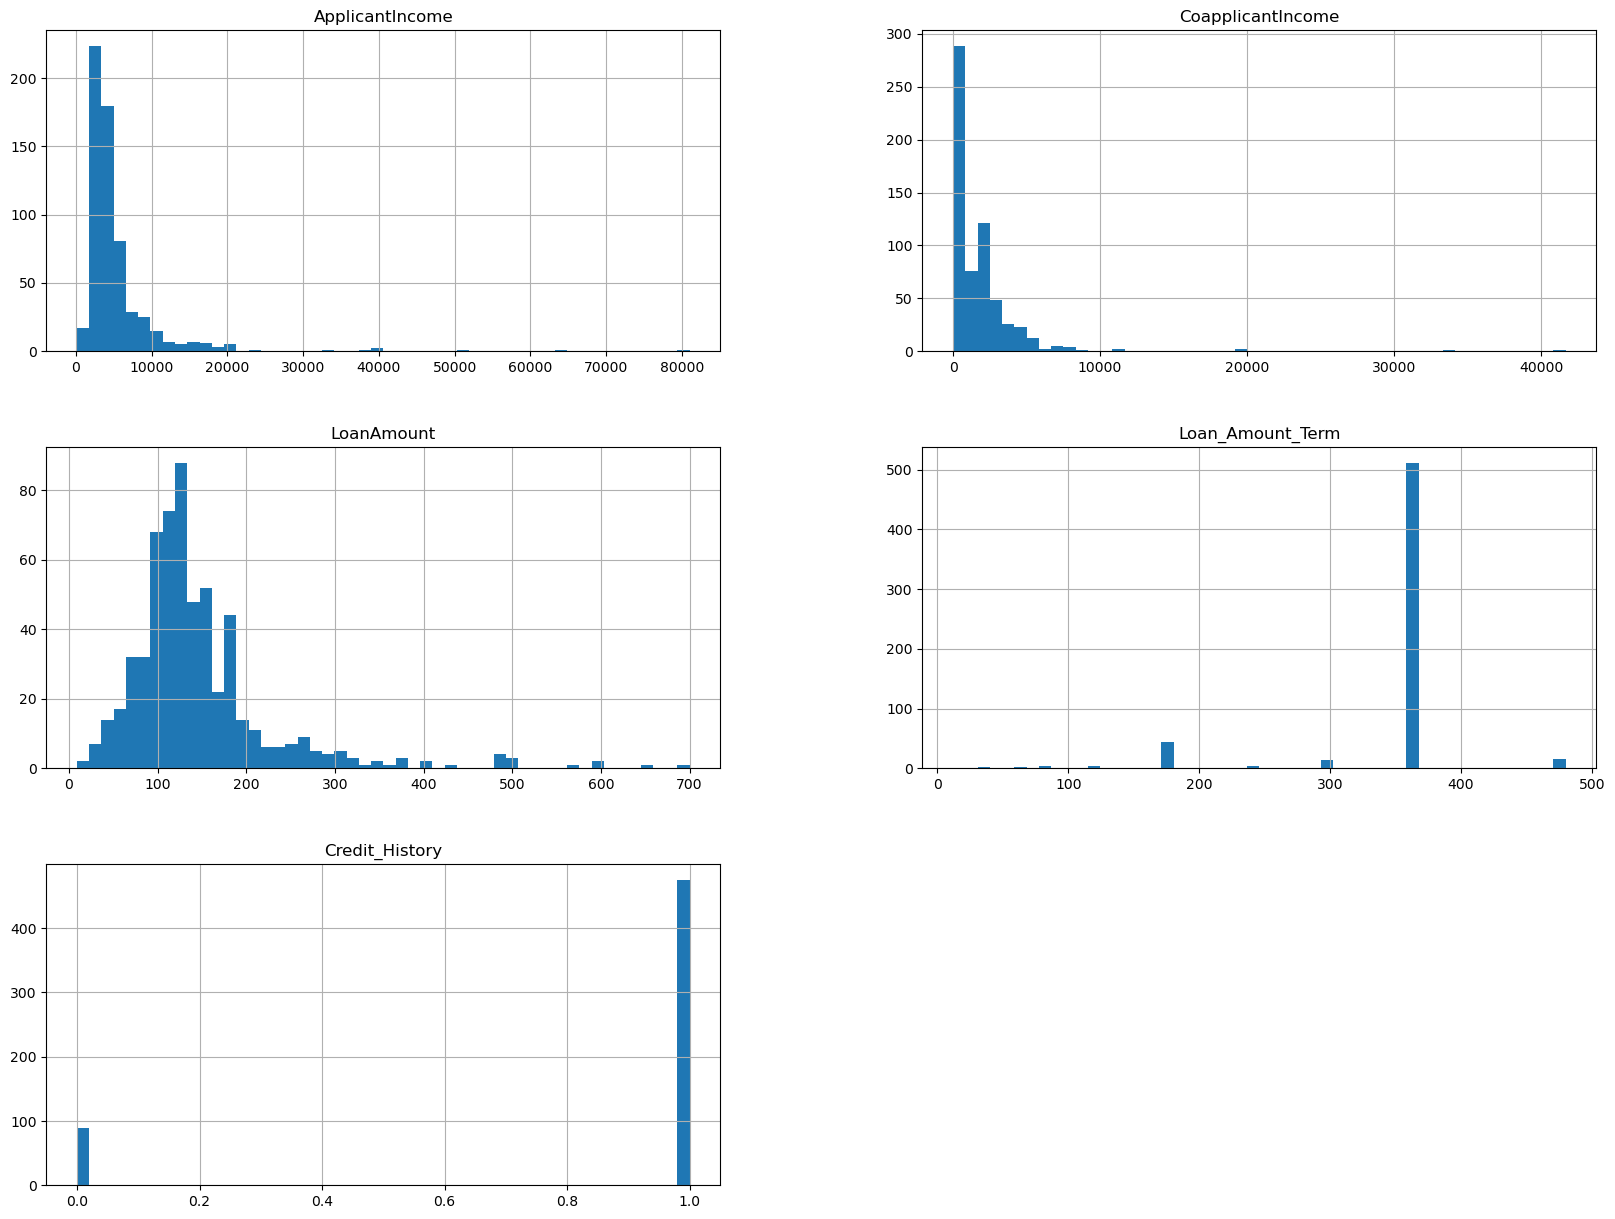

In [4]:
# Histograms
data.hist(bins=50, figsize=(20,15))

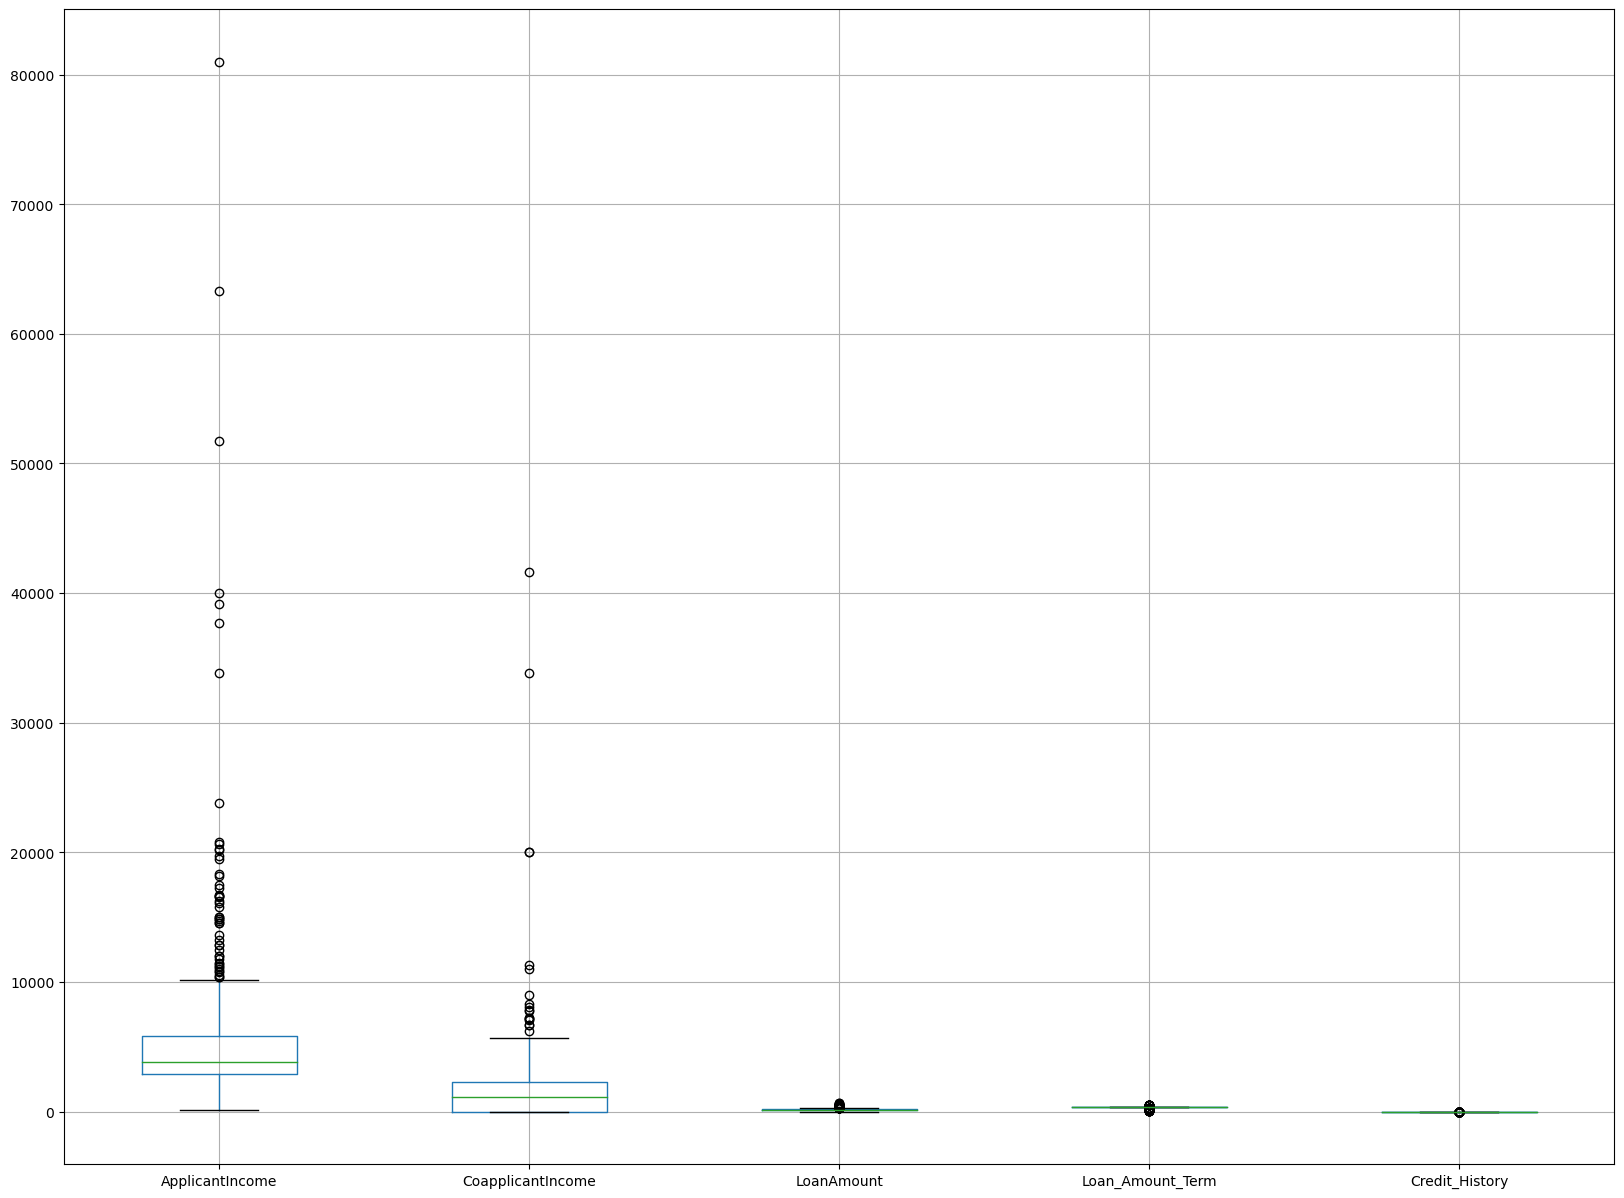

In [5]:
# Boxplots
data.boxplot(figsize=(20,15))
plt.show()

* Data Visualization Analysis:
    - From the histograms and the boxplots, we can easily see there are a lot of outliers in the dataset.
    - This his helpful in deciding how to handle missing values.

* Data cleaning:
    - Search for missing values.


In [6]:

# Check the number of missing values in each column
missing_values = data.isnull().sum()
missing_values


Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

* Fill numerical missing values with median instead of mean because we have outliers.
* Fill categorical missing values with mode.

In [7]:
#Fill missing categorical values with mode of said column
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']:
    data[column].fillna(data[column].mode()[0], inplace=True)

'''
Fill missing numerical values with median.
Decided to do the median instead of the mean because
data has outliers.
'''
for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    data[column].fillna(data[column].median(), inplace=True)

#Check if there are any missing values left
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64

* Look for data correlation
    - First convert categorical values into numerical values in order to be able to see how the data correlates to Loan_Status

In [8]:
# Makes a copy of original data frame in order to not change original values
data_encoded = data.copy()

'''
Convert Loan_Status to numerical.
Y to the number 1 and N to the number 0'''
data_encoded['Loan_Status'] = data_encoded['Loan_Status'].map({'Y': 1, 'N': 0})

# Apply one-hot encoding to categorical features
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'property_Area']
data_encoded = pd.get_dummies(data_encoded, columns=categorical_features)

# Apply ordinal encoding to 'Dependents' feature
dependents_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
data_encoded['Dependents'] = data_encoded['Dependents'].map(dependents_mapping)

# Display the first few rows of the encoded data
data_encoded.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,property_Area_Rural,property_Area_Semiurban,property_Area_Urban
0,LP001002,0,5849.0,0.0,128.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
1,LP001003,1,3806.0,1508.0,128.0,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,3000.0,0.0,66.0,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,2583.0,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,6000.0,0.0,141.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1


In [9]:
# Display the correlation Matrix with 'Loan_Status'
corr_matrix = data_encoded.corr()
corr_matrix["Loan_Status"].sort_values(ascending=False)
corr_matrix["Loan_Status"]


/var/folders/0r/cspyd7gn35n_w69jrx0rxmn00000gn/T/ipykernel_75897/1554169803.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_encoded.corr()


Dependents                 0.010118
ApplicantIncome           -0.004608
CoapplicantIncome         -0.059439
LoanAmount                -0.033214
Loan_Amount_Term          -0.022549
Credit_History             0.540556
Loan_Status                1.000000
Gender_Female             -0.017987
Gender_Male                0.017987
Married_No                -0.091478
Married_Yes                0.091478
Education_Graduate         0.085884
Education_Not Graduate    -0.085884
Self_Employed_No           0.003700
Self_Employed_Yes         -0.003700
property_Area_Rural       -0.100694
property_Area_Semiurban    0.136540
property_Area_Urban       -0.043621
Name: Loan_Status, dtype: float64

* Correlation Analysis
    - The feature with the biggest positive correlation to loan status is the Credit History feature.
    - All other features have either a small positive correlation or small negative correlation.
* Data Reduction:
    - Even though most features have a low correlation to loan status, I wont be reducing the data because a combination of it can impact the loan status to change.

* Visualization of correlation

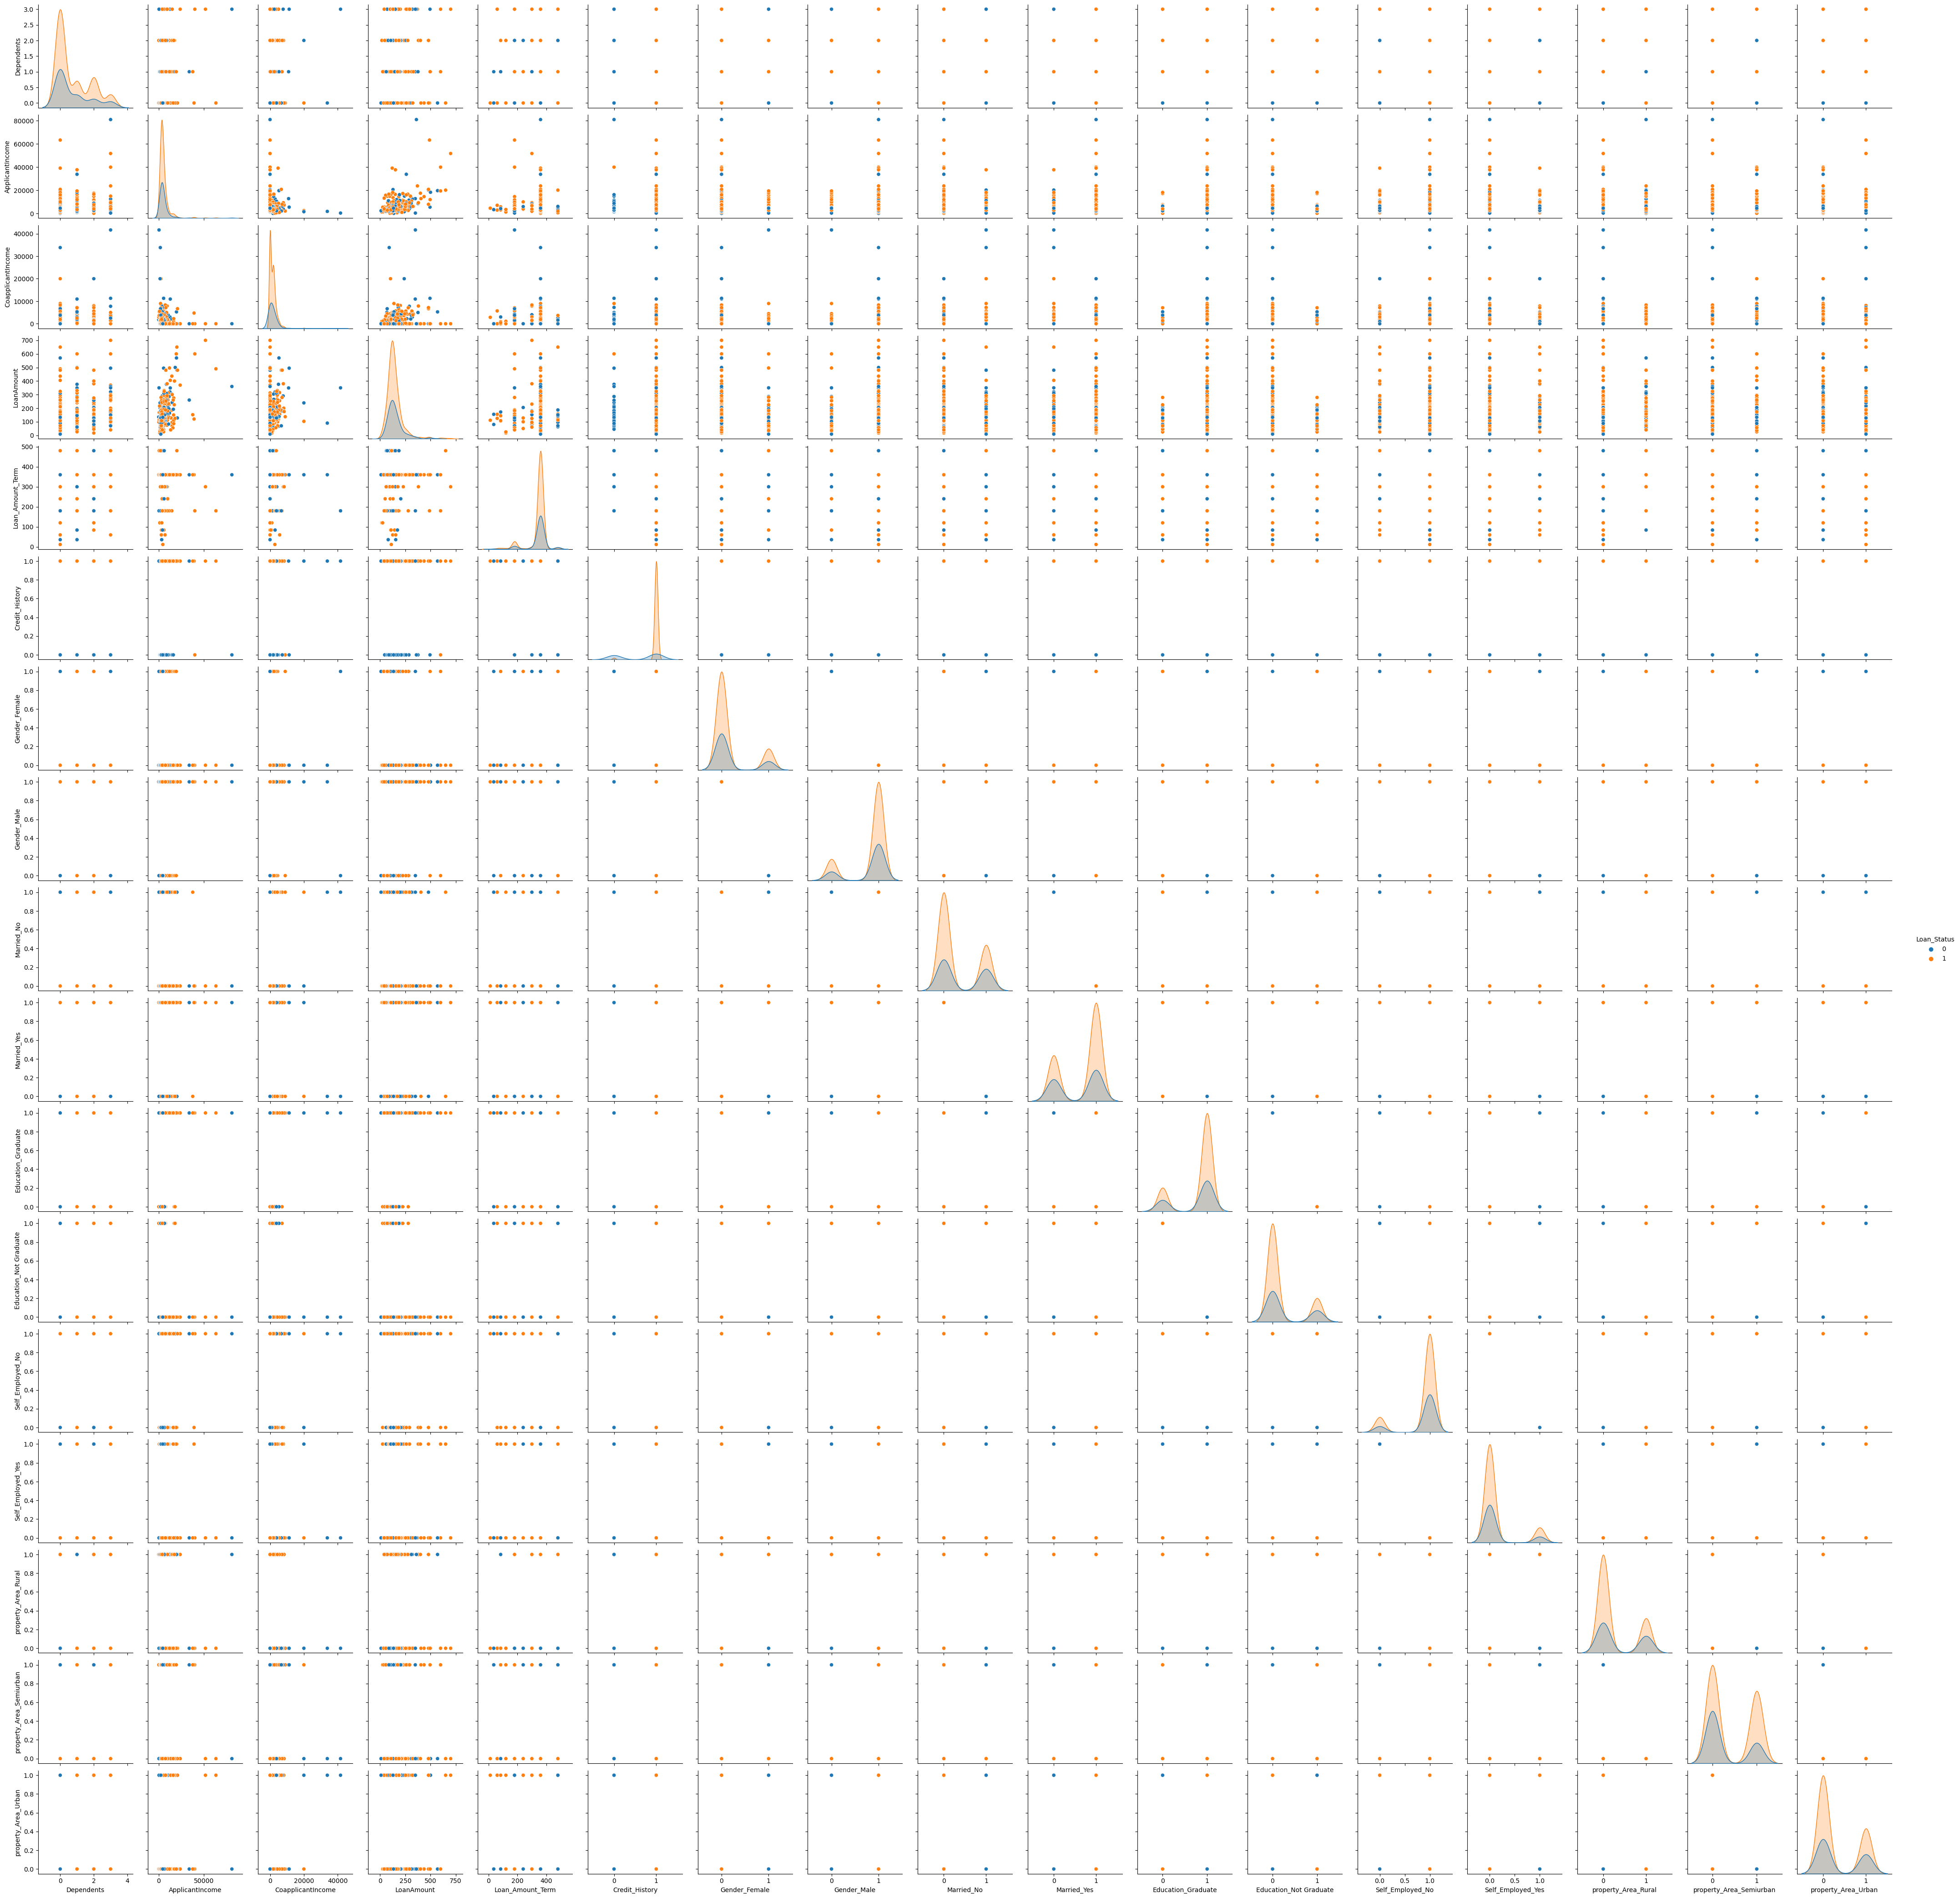

In [10]:
# Data Visualization for Correlation Matrix
sns.pairplot(data_encoded, hue='Loan_Status')

--------------------------------------------------------------------------------------


Step 3: Prepare Data for ML Algorithm
* Feature Engineering
    - The chose to engineer features around features that have a positive correlation to Loan_Status.

In [11]:
data_encoded['SelfEmployedWithHistory'] = data_encoded['Self_Employed_Yes'] * data_encoded['Credit_History']

data_encoded['LoanAmountWithHistory'] = data_encoded['LoanAmount'] * data_encoded['Credit_History']

'''
The following features are some of the feature engineering I tried 
but they affect the model negatively.
'''

# Creating a new feature called TotalIncome by combining Applicant & Coapplicant Incomes
#data_encoded['TotalIncome'] = data_encoded['ApplicantIncome'] + data_encoded['CoapplicantIncome']

# Creating a new feature out of the correlation relationship of two other features
#data_encoded['IncomePerDependent'] = data_encoded['TotalIncome'] / (data_encoded['Dependents'] + 1)

#data_encoded['LoanToIncome'] = data_encoded['LoanAmount'] / data_encoded['TotalIncome']

#data_encoded.head()

'\nThe following features are some of the feature engineering I tried \nbut they affect the model negatively.\n'

* Feature Engineering did little to no positive impact on the models prediction accuracy and precision.
* On the other hand, it actually lowered the accuracy and precision. That is the reason it is comment out.

* Data Splitting:
    - I will be splitting the data into training data and testing data.
    - The split will be 80% training data and 20% testing data.
    - This step is important because it will help measure the models prediction accuracy.

In [12]:
from sklearn.model_selection import train_test_split

# Separate the target variable ('Loan_Status') from the predictors
X = data_encoded.drop(['Loan_ID', 'Loan_Status'], axis=1)  # predictors
y = data_encoded['Loan_Status']  # target

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the splits
X_train.shape, X_test.shape


((491, 19), (123, 19))

* Data Transformation:
    - Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler
scaler = StandardScaler()

'''Calculates and stores the mean and standard deviation
of the provided data, preparing the scaler for subsequent transformations. 
'''
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

--------------------------------------------------------------------------------------

Step 4: Select Model and Train it
* The model I selected is the Logistic Regression Model

In [14]:
#Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

--------------------------------------------------------------------------------------

Step 5: Evaluate Model

* Use K-Fold Cross-Validation to evaluate model performance. It will divide the data given into different subsets of the data for training and testing. 

In [15]:
# Measuring accuracy with Cross-Validation
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, X_test_scaled, y_test, cv=3, scoring="accuracy")

array([0.75609756, 0.70731707, 0.70731707])

In [16]:
# Use the trained model to make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)

#Precision
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred) # 79 / (79 + 25)

0.7596153846153846

In [17]:
#Recall 
recall_score(y_test, y_pred) # 79 / (79 + 1)

0.9875

--------------------------------------------------------------------------------------

Step 5: Prediction Deployment

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


print("Confusion Matrix: ")
conf_mx= confusion_matrix(y_test, y_pred)
conf_mx

Confusion Matrix: 


array([[18, 25],
       [ 1, 79]])

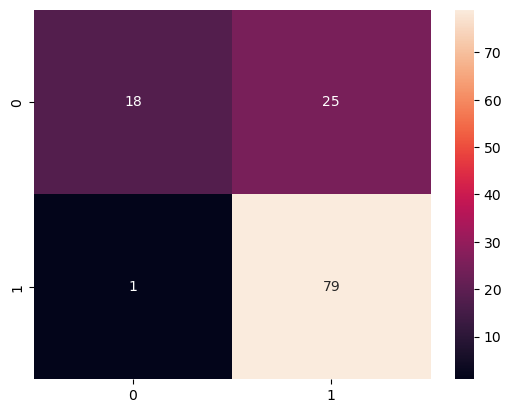

In [19]:
# Confusion Matrix HeatMap
ax = sns.heatmap(conf_mx, annot=True)


* Confusion Matrix Break Down:
    - 18 is the True Negative count.
    - 25 is the False Positive count.
    - 1 is the False Negative  count.
    - 79 is the True Positive  count.

In [20]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision of the model
precision = precision_score(y_test, y_pred)

# Calculate the recall of the model
recall = recall_score(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
